In [1]:
import enum
import pickle
from pprint import pprint

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


sns.set_theme()

In [2]:
df_reviews = pd.read_csv("data/raw/reviews.csv")

In [3]:
df_reviews.head()

,rating,review
0,50,This is one of the best hotels I've ever staye...
1,50,Everything about this hotel was awesome. The s...
2,50,Our tour group stayed here for two nights. Th...
3,50,Excellent service at Porta Hotel Antigua. From...
4,50,I almost always stay at Hotel Antigua when I t...


In [4]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15682 entries, 0 to 15681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  15682 non-null  int64 
 1   review  15682 non-null  object
dtypes: int64(1), object(1)
memory usage: 245.2+ KB


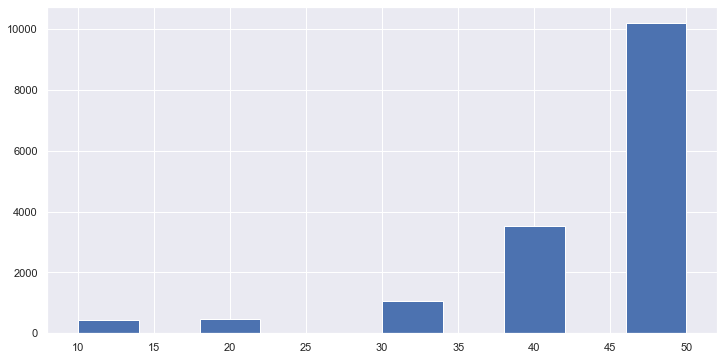

In [5]:
_ = plt.figure(figsize=(12, 6))
_ = plt.hist(df_reviews.loc[:, "rating"])

plt.show()

In [6]:
df_reviews.groupby("rating").count()

,review
rating,
10,428
20,456
30,1060
40,3525
50,10213


In [7]:
class Sentiments(enum.Enum):
    POS = "POS"
    NEG = "NEG"

In [8]:
hyper_sen_trshld = 50

df_reviews["sentiment"] = df_reviews["rating"].apply(lambda x: Sentiments.POS if x >= hyper_sen_trshld else Sentiments.NEG)
df_reviews["is_50"] = df_reviews["rating"].apply(lambda x: x == 50)

In [9]:
df_reviews.head()

,rating,review,sentiment,is_50
0,50,This is one of the best hotels I've ever staye...,Sentiments.POS,True
1,50,Everything about this hotel was awesome. The s...,Sentiments.POS,True
2,50,Our tour group stayed here for two nights. Th...,Sentiments.POS,True
3,50,Excellent service at Porta Hotel Antigua. From...,Sentiments.POS,True
4,50,I almost always stay at Hotel Antigua when I t...,Sentiments.POS,True


In [10]:
df_reviews.loc[:, "sentiment"].value_counts()

Sentiments.POS    10213
Sentiments.NEG     5469
Name: sentiment, dtype: int64

<AxesSubplot:>

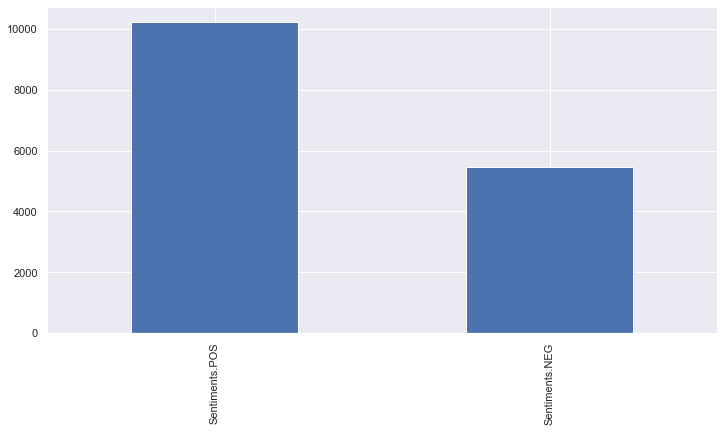

In [11]:
_ = plt.figure(figsize=(12, 6))
df_reviews["sentiment"].value_counts().plot(kind="bar")

In [12]:
df_reviews['sentiment'].value_counts()

Sentiments.POS    10213
Sentiments.NEG     5469
Name: sentiment, dtype: int64

In [13]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15682 entries, 0 to 15681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating     15682 non-null  int64 
 1   review     15682 non-null  object
 2   sentiment  15682 non-null  object
 3   is_50      15682 non-null  bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 383.0+ KB


In [14]:
data_classes = {sentiment.value: df_reviews[df_reviews["sentiment"] == sentiment]["review"].values.tolist() for sentiment in Sentiments}

In [15]:
print(type(data_classes))

<class 'dict'>


In [16]:
# As a result we have a dictionary with two keys (positive and negative). 
# Each of the keys has a list where each element is a review

print(data_classes['NEG'][0])

Casa del Arco is a very conveniently located bed and breakfast place in Antigua Guatemala. It's just two minute walking distance from Parque Central and the Arch of Catalina. In fact given its central location, just about every attraction in the town is accessible by walk. The place is a cosy nook with few rooms. That said, you can almost have their little lounge to yourself when you want. The rooms are tastefully done with Guatemalan textile and clean. The bed was comfortable as well. The only issue I had was the lack of ventilation. The room window opened to the steps just besides the room that would compromise my privacy but as I had mentioned, there are few rooms and very less people in the property so it was fine. The highlight of the place is the breakfast cooked by the


In [17]:
with open(r"data/interim/model_1/review_classes.pkl", "wb") as output_file:
    pickle.dump(data_classes, output_file)